In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

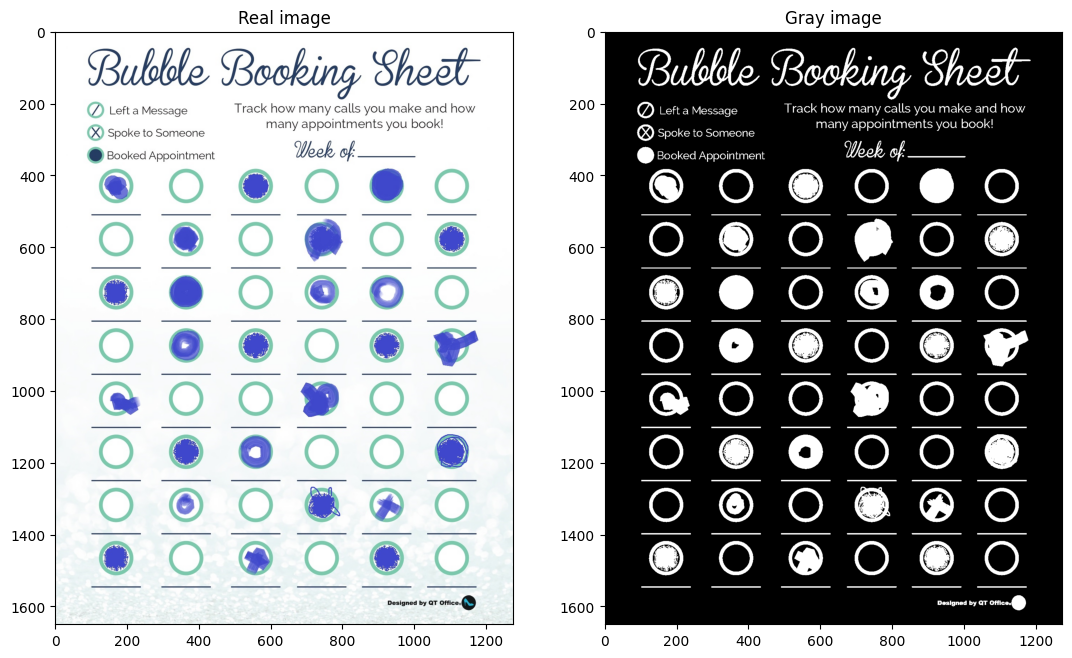

In [2]:
img = cv2.cvtColor(cv2.imread("images/test1.jpg"),cv2.COLOR_BGR2RGB)   # test image
img = cv2.resize(img,(1275,1650),cv2.INTER_CUBIC)

gray_img = cv2.inRange(cv2.cvtColor(np.copy(img),cv2.COLOR_RGB2GRAY),0,200)   # gray image

plt.figure(figsize=(13,13))
plt.subplot(121)
plt.title("Real image")
plt.imshow(img)
plt.subplot(122)
plt.title("Gray image")
plt.imshow(gray_img, cmap='gray')
plt.show()

In [3]:
# position point in x coordinate

pos = [170, 195, 193, 184, 181, 181]

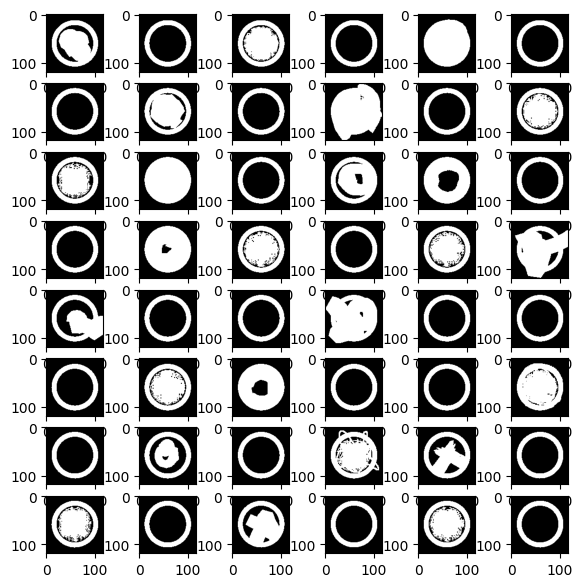

In [4]:
plt.figure(figsize=(7,7))

for k,i in enumerate(range(431,1468,148)):
    for j in range(6):
        square = np.copy(gray_img[i-60:i+59,sum(pos[:j+1])-59:sum(pos[:j+1])+60])
        
        plt.subplot(8,6,k*6+j+1)
        plt.imshow(square, cmap='gray')

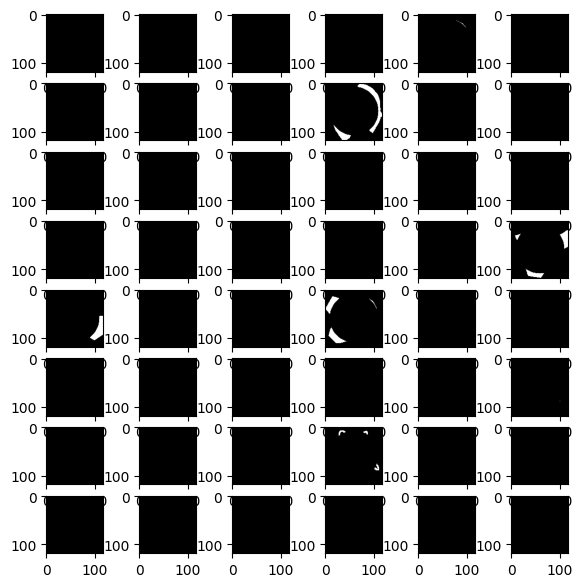

In [5]:
plt.figure(figsize=(7,7))
for k,i in enumerate(range(431,1468,148)):
    for j in range(6):
        square = np.copy(gray_img[i-60:i+59,sum(pos[:j+1])-59:sum(pos[:j+1])+60])
        circle1 = cv2.circle(np.copy(square), (59,59), 50, 0, -1)
        plt.subplot(8,6,k*6+j+1)
        plt.imshow(circle1, cmap='gray')

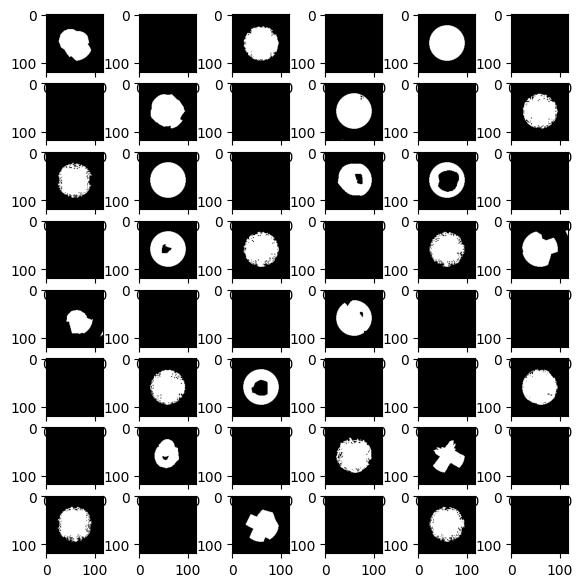

In [6]:
plt.figure(figsize=(7,7))
for k,i in enumerate(range(431,1468,148)):
    for j in range(6):
        square = np.copy(gray_img[i-60:i+59,sum(pos[:j+1])-59:sum(pos[:j+1])+60])
        circle2 = cv2.circle(np.copy(square), (59,59), 50, 0, 25)
        plt.subplot(8,6,k*6+j+1)
        plt.imshow(circle2, cmap='gray')

In [7]:
# checking answers

num_ans = []
for i in range(431,1468,148):
    for j in range(6):
        a = 0       # unchecked answer
        square = np.copy(gray_img[i-60:i+59,sum(pos[:j+1])-59:sum(pos[:j+1])+60])
        circle1 = cv2.circle(np.copy(square), (59,59), 50, 0, -1)
        circle2 = cv2.circle(np.copy(square), (59,59), 50, 0, 25)
        if circle1.sum()>27000:
            a = 2     # incorrect answer
        else:
            if circle2.sum()>20000:
                a = 2     # incorrect answer
            if circle2.sum()>880000:
                a = 1     # correct answer
        num_ans.append(a)
        
print("checked answer\n")
print(np.reshape(num_ans, (8,6)))

checked answer

[[2 0 1 0 1 0]
 [0 1 0 2 0 1]
 [2 1 0 2 2 0]
 [0 1 1 0 1 2]
 [2 0 0 2 0 0]
 [0 1 2 0 0 1]
 [0 2 0 2 2 0]
 [2 0 2 0 1 0]]


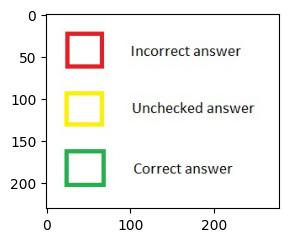

In [8]:
# instruction

plt.figure(figsize=(3,3))
ins = cv2.cvtColor(cv2.imread("images/instruction.jpg"),cv2.COLOR_BGR2RGB)
plt.imshow(ins)
plt.show()

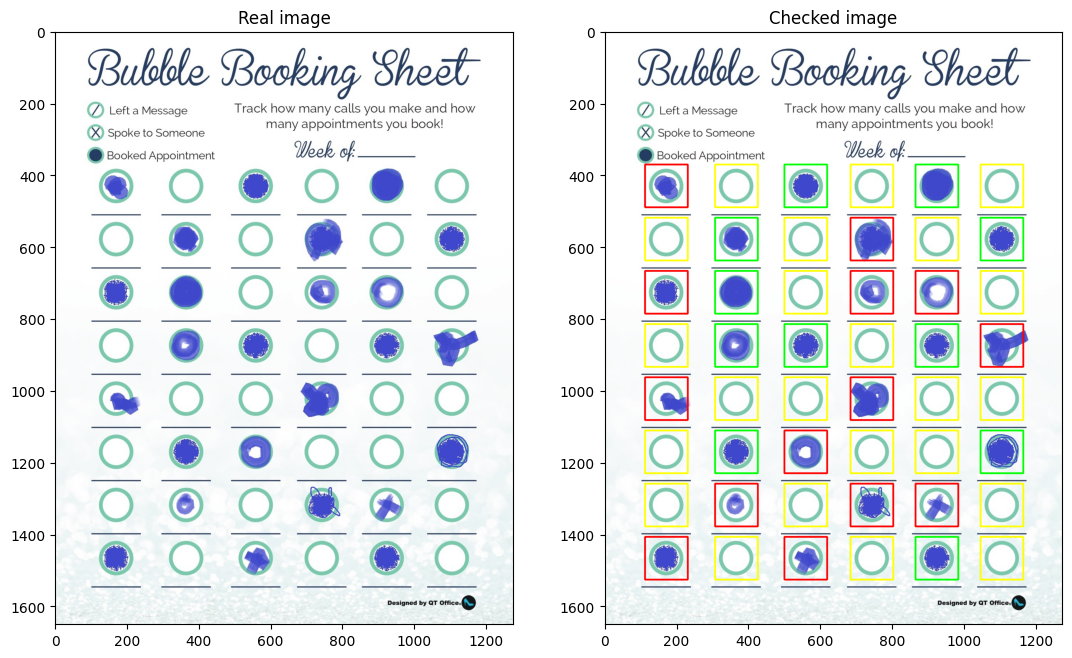

In [9]:
# final result

plt.figure(figsize=(13,13))

img_copy = np.copy(img)
colors = [(255,255,0),(0,255,0),(255,0,0)]  # yellow, green, red

for z,i in enumerate(range(431,1468,148)):
    for j in range(6):
        cv2.rectangle(img_copy,(sum(pos[:j+1])-59,i-60),(sum(pos[:j+1])+60,i+59),colors[num_ans[z*6+j]],3)
    
plt.subplot(121)
plt.title("Real image")
plt.imshow(img)
plt.subplot(122)
plt.title("Checked image")
plt.imshow(img_copy)
plt.show()